In [1]:
import pandas
import numpy
import matplotlib.pyplot as mp
import statsmodels.api as sm
import seaborn
seaborn.set()

In [2]:
raw_data = pandas.read_csv('1.03. Dummies.csv')

In [4]:
raw_data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


In [5]:
data = raw_data.copy()
data['Attendance'] = data['Attendance'].map({'Yes':1, 'No':0})
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


In [8]:
y = data['GPA']
x1 = data[['SAT', 'Attendance']]
x = sm.add_constant(x1)
result = sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Wed, 13 Nov 2019   Prob (F-statistic):           2.19e-15
Time:                        06:49:39   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

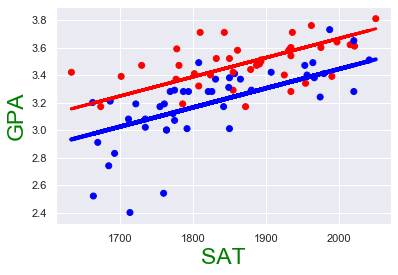

In [30]:
mp.scatter(data['SAT'],y, c=data['Attendance'], cmap='bwr')
yhat_yes = 0.0014*data['SAT']+0.6439 +0.2226
yhat_no = 0.0014*data['SAT'] +0.6439
fig1 = mp.plot(data['SAT'],yhat_yes, c='red', lw=3)
fig1 = mp.plot(data['SAT'],yhat_no, c='blue', lw=4)
mp.ylabel('GPA', c='green', fontsize = 23)
mp.xlabel('SAT', c='green', fontsize = 23)
mp.show()